# Obesity Classification using Machine Learning Approaches

### Load necessary packages

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

### Load the dataset

In [142]:
df = pd.read_csv('ObesityClassification.csv')

##### Overview

In [143]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [145]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,108.0,NaN,NaN,NaN,56.046296,31.917939,1.0,28.75,56.5,83.25,110.0
Age,108.0,NaN,NaN,NaN,46.555556,24.72062,11.0,27.0,42.5,59.25,112.0
Gender,108,2,Male,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Height,108.0,NaN,NaN,NaN,166.574074,27.873615,120.0,140.0,175.0,190.0,210.0
Weight,108.0,NaN,NaN,NaN,59.490741,28.856233,10.0,35.0,55.0,85.0,120.0
BMI,108.0,NaN,NaN,NaN,20.549074,7.583818,3.9,16.7,21.2,26.1,37.2
Label,108,4,Underweight,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data cleaning

In [146]:
# checking for null values
df.isna().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [147]:
# dropping the ID column
df.drop('ID',axis=1,inplace=True)

In [148]:
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese


### Visualizations

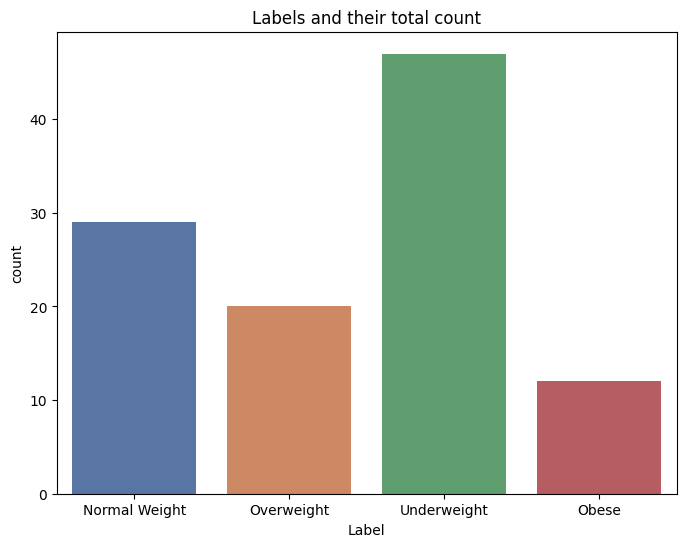

In [149]:
plt.figure(figsize=(8,6),dpi=100)
sns.countplot(data=df,x='Label',palette='deep')
plt.title('Labels and their total count');

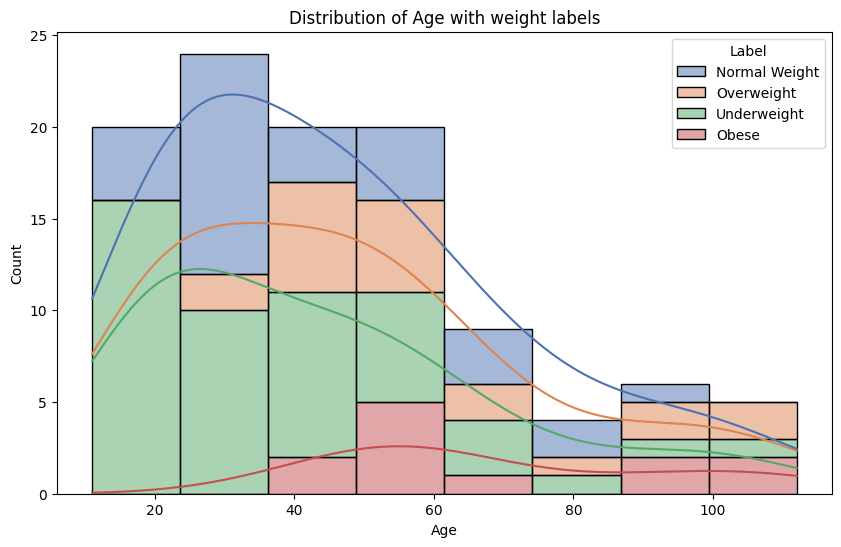

In [150]:
plt.figure(figsize=(10,6),dpi=100)
sns.histplot(data=df,x='Age',kde=True,hue='Label',multiple='stack',palette='deep')
plt.title('Distribution of Age with weight labels');

In [151]:
# dropping the ID column
df.drop('BMI',axis=1,inplace=True)

In [152]:
print(df['Gender'].unique())
print(df['Label'].unique())

['Male' 'Female']
['Normal Weight' 'Overweight' 'Underweight' 'Obese']


In [153]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Label'] = label_encoder.fit_transform(df['Label'])

In [154]:
print(df['Gender'].unique())
print(df['Label'].unique())

[1 0]
[0 2 3 1]


In [155]:
df

,Age,Gender,Height,Weight,Label
0,25,1,175,80,0
1,30,0,160,60,0
2,35,1,180,90,2
3,40,0,150,50,3
4,45,1,190,100,1
...,...,...,...,...,...
103,11,1,175,10,3
104,16,0,160,10,3
105,21,1,180,15,3
106,26,0,150,15,3


## Splitting of Features & Label

In [156]:
# creating X,y
X = pd.get_dummies(df.drop(['Label'],axis=1),drop_first=True)
y = df['Label']

## Split Train & Test

In [157]:
# Choosing 15%  as test size 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

### Standard Scaler

In [158]:
# instantiating standard scaler
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

## Model building

## Logistic Regression

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

logr = LogisticRegression()
estimators = [('dt', DecisionTreeClassifier()),('lr', LogisticRegression())]

lr = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression())

lr.fit(X_train, y_train)

c:\Users\intel 3\SoftwareFol\envs\ttsf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\intel 3\SoftwareFol\envs\ttsf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('lr', LogisticRegression())],
                   final_estimator=LogisticRegression())

In [161]:
print(lr.score(X_train, y_train))

1.0


In [162]:
y_pred_lr = lr.predict(X_test)

In [163]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         7

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [164]:
print(lr.score(X_test,y_test))

1.0


## Logistic Regression

In [165]:

logr = LogisticRegression()

logr.fit(X_train_scaled, y_train)
print(logr.score(X_train_scaled, y_train))

0.8681318681318682


In [166]:
y_pred_logr = logr.predict(X_test_scaled)
print(classification_report(y_test,y_pred_logr))

print(logr.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.67      0.80         3
           2       0.50      0.50      0.50         2
           3       0.88      1.00      0.93         7

    accuracy                           0.82        17
   macro avg       0.79      0.74      0.76        17
weighted avg       0.83      0.82      0.82        17

0.17647058823529413


c:\Users\intel 3\SoftwareFol\envs\ttsf\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### BackupLearning

In [167]:
import pickle
pickle.dump(lr, open("LRoc.pkl", "wb"))
pickle.load(open("LRoc.pkl", "rb"))

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('lr', LogisticRegression())],
                   final_estimator=LogisticRegression())